# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. 
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!
First we need to start with the proper imports, which we've already laid out for you here.
*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [35]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

## Data

We need to get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [36]:
df = pd.read_pickle('all_banks')

In [37]:
df.columns

MultiIndex([('BAC',   'Open'),
            ('BAC',   'High'),
            ('BAC',    'Low'),
            ('BAC',  'Close'),
            ('BAC', 'Volume'),
            (  'C',   'Open'),
            (  'C',   'High'),
            (  'C',    'Low'),
            (  'C',  'Close'),
            (  'C', 'Volume'),
            ( 'GS',   'Open'),
            ( 'GS',   'High'),
            ( 'GS',    'Low'),
            ( 'GS',  'Close'),
            ( 'GS', 'Volume'),
            ('JPM',   'Open'),
            ('JPM',   'High'),
            ('JPM',    'Low'),
            ('JPM',  'Close'),
            ('JPM', 'Volume'),
            ( 'MS',   'Open'),
            ( 'MS',   'High'),
            ( 'MS',    'Low'),
            ( 'MS',  'Close'),
            ( 'MS', 'Volume'),
            ('WFC',   'Open'),
            ('WFC',   'High'),
            ('WFC',    'Low'),
            ('WFC',  'Close'),
            ('WFC', 'Volume')],
           names=['Bank Ticker', 'Stock Info'])

In [38]:
BAC = df['BAC']

In [39]:
Citi = df['C']

In [40]:
GS = df['GS']

In [41]:
JPM = df['JPM']

In [42]:
MS = df['MS']

In [43]:
WFC = df['WFC']

In [44]:
WFC

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,31.60,31.98,31.20,31.90,11016400
2006-01-04,31.80,31.82,31.36,31.53,10871000
2006-01-05,31.50,31.56,31.31,31.50,10158000
2006-01-06,31.58,31.78,31.38,31.68,8403800
2006-01-09,31.68,31.82,31.56,31.68,5619600
...,...,...,...,...,...
2015-12-24,54.97,55.09,54.71,54.82,4999417
2015-12-28,54.55,54.78,54.17,54.68,8288841
2015-12-29,55.11,55.35,54.99,55.29,7894876


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [45]:
tickers = ['BAC', 'Citi', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [46]:
bank_stocks = pd.concat([BAC, Citi, GS, JPM, MS, WFC], axis=1, keys=tickers)

** Set the column name levels (this is filled out for you):**

In [47]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [48]:
bank_stocks.head()

Bank Ticker    BAC                                  Citi                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [49]:
# Method 1
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())

BAC 54.9
Citi 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [50]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC      54.90
Citi    564.10
GS      247.92
JPM      70.08
MS       89.30
WFC      58.52
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [51]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [52]:
for tick in tickers:
    returns[tick+' Returns'] = bank_stocks[tick]['Close'].pct_change()

In [53]:
returns.head()

,BAC Returns,Citi Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

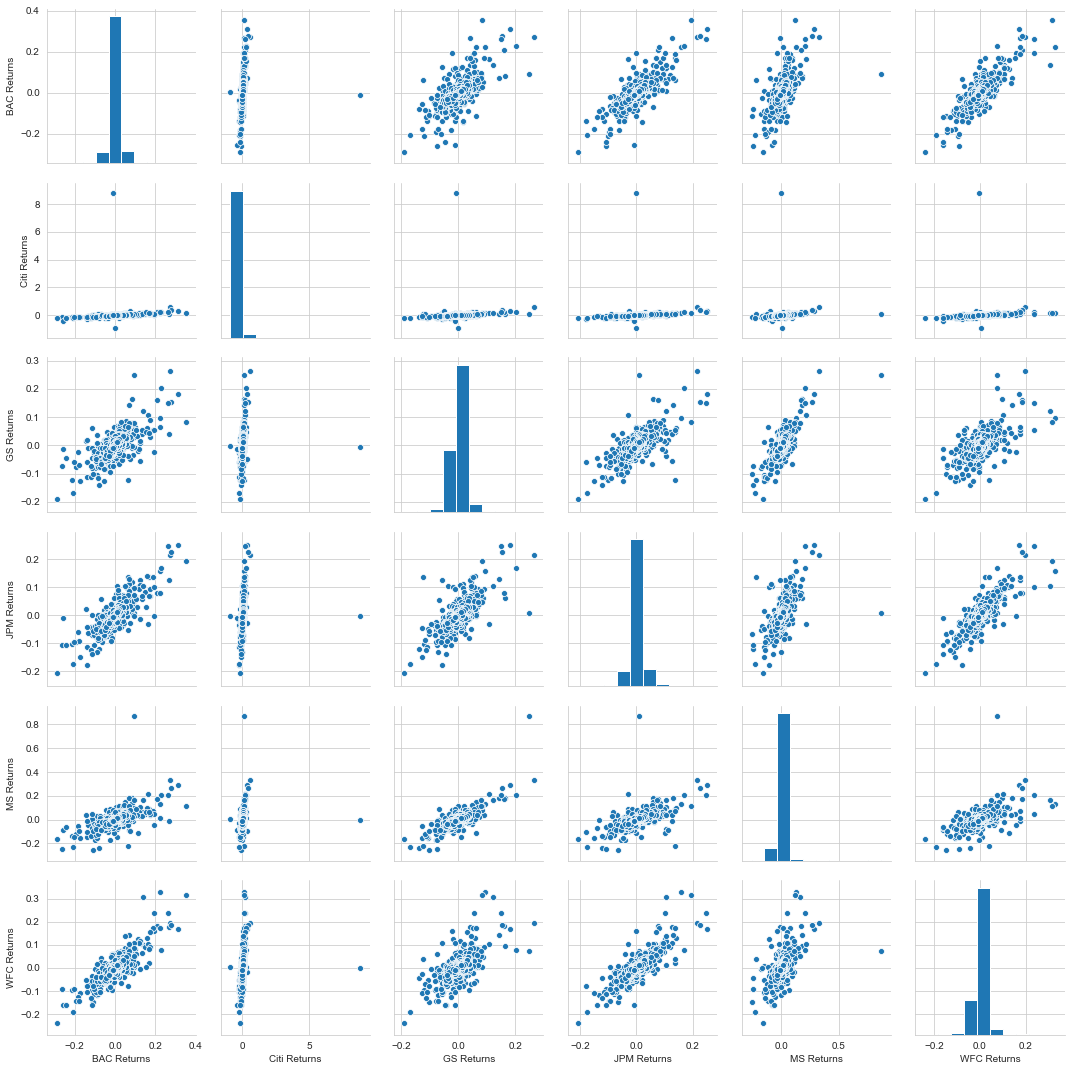

In [54]:
sns.pairplot(returns[1:])

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [55]:
returns.idxmin()

BAC Returns    2009-01-20
Citi Returns   2011-05-06
GS Returns     2009-01-20
JPM Returns    2009-01-20
MS Returns     2008-10-09
WFC Returns    2009-01-20
dtype: datetime64[ns]

In [56]:
returns.idxmax()

BAC Returns    2009-04-09
Citi Returns   2011-05-09
GS Returns     2008-11-24
JPM Returns    2009-01-21
MS Returns     2008-10-13
WFC Returns    2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [57]:
returns.std()

BAC Returns     0.036650
Citi Returns    0.179969
GS Returns      0.025346
JPM Returns     0.027656
MS Returns      0.037820
WFC Returns     0.030233
dtype: float64

In [58]:
returns.loc['2015-01-01': '2015-12-31'].std()

BAC Returns     0.016163
Citi Returns    0.015289
GS Returns      0.014046
JPM Returns     0.014017
MS Returns      0.016249
WFC Returns     0.012591
dtype: float64

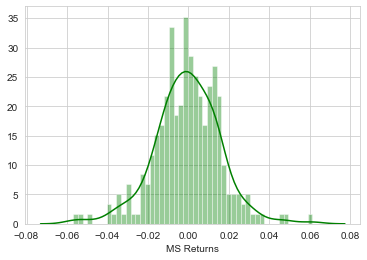

In [59]:
sns.distplot(returns.loc['2015-01-01': '2015-12-31']['MS Returns'], color='green', bins=50)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

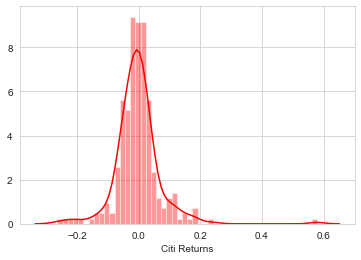

In [60]:
sns.distplot(returns.loc['2008-01-01': '2008-12-31']['Citi Returns'], color='red', bins=50)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

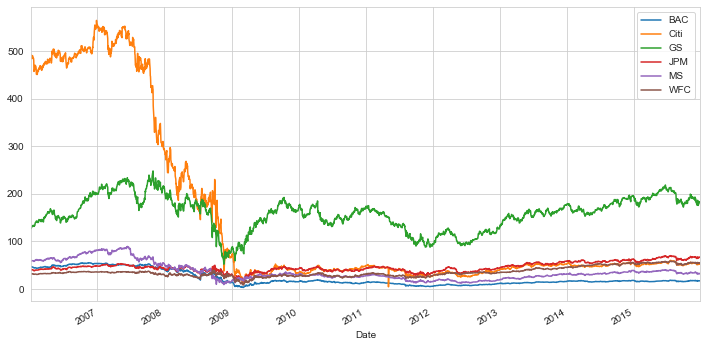

In [65]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,6))
plt.legend()

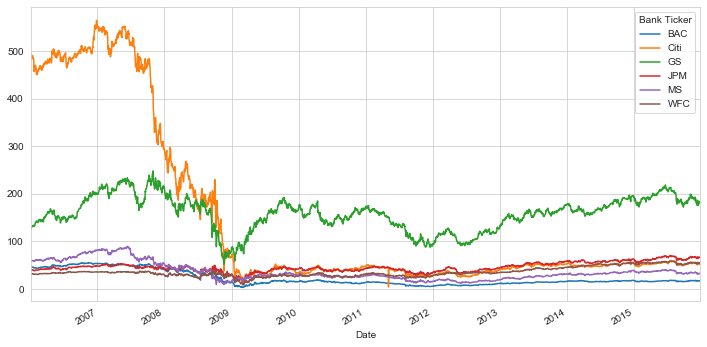

In [67]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').plot(label=tick, figsize=(12,6))

In [70]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

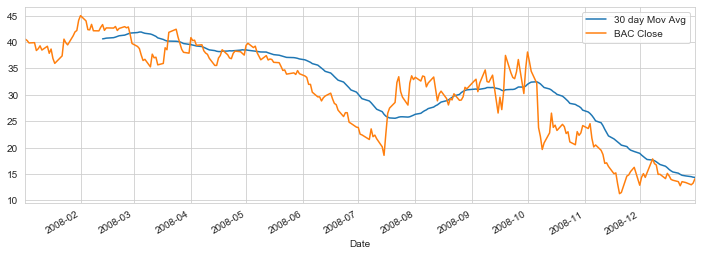

In [76]:
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day Mov Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

In [79]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()

Bank Ticker,BAC,Citi,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
Citi,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
WFC,0.008567,-0.068441,0.499901,0.940279,0.131864,1.000000


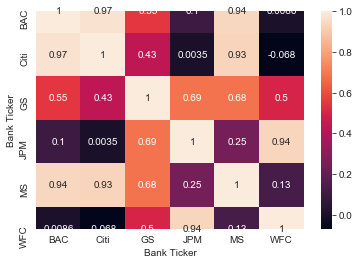

In [83]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

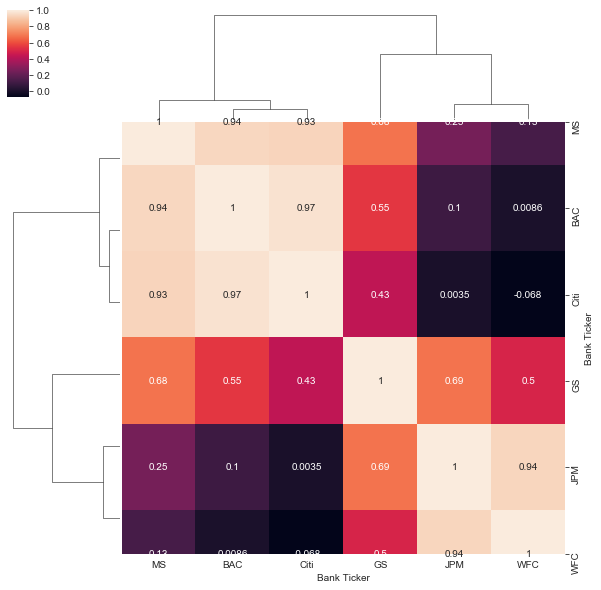

In [82]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

In [84]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr.iplot(kind='heatmap', colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [87]:
bac15 = BAC[['Open', 'High', 'Low', 'Close']].loc['2015-01-01': '2016-01-01']

In [91]:
bac15.iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [93]:
MS['Close'].loc['2015-01-01': '2016-01-01'].ta_plot(study='sma', periods=[13, 21, 55])

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [94]:
BAC['Close'].loc['2015-01-01': '2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.